In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle'))

In [4]:
cols = ['user id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/ratings.dat', sep='::', index_col=False, names=cols, encoding="UTF-8")

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
ratings.head()

,user id,item_id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [6]:
rating_counts = ratings['rating'].value_counts()
print(rating_counts)

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64


In [7]:
sorted_counts = rating_counts.sort_index()
print(sorted_counts)

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64


Text(0,0.5,'Count')

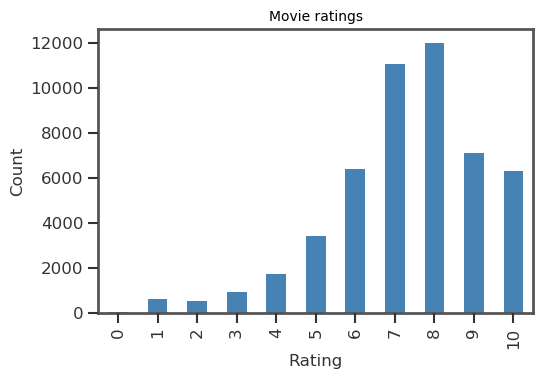

In [8]:
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [9]:
cols = ['movie id', 'movie title', 'genre']
movies = pd.read_csv('data/movies.dat', sep='::', index_col=False, names=cols, encoding="UTF-8")

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [10]:
movies.head()

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [11]:
drama = movies[movies['genre']=='Crime|Drama']

In [12]:
is_drama = movies['genre'] == 'Crime|Drama'
is_drama.head()

0     True
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

In [13]:
drama_ids = drama['movie id']
drama_ids.head()

0       2844
54     23817
208    40522
236    42876
251    44515
Name: movie id, dtype: int64

In [14]:
criterion = ratings['item_id'].map(lambda x: (drama_ids == x).any())
drama_ratings = ratings[criterion]
drama_ratings.head()

,user id,item_id,rating,timestamp
128,18,86066,10,1363985505
150,23,1212450,8,1364166586
176,26,1817273,8,1367761386
194,36,68646,9,1364834910
195,36,71562,10,1365005772


Text(0,0.5,'Count')

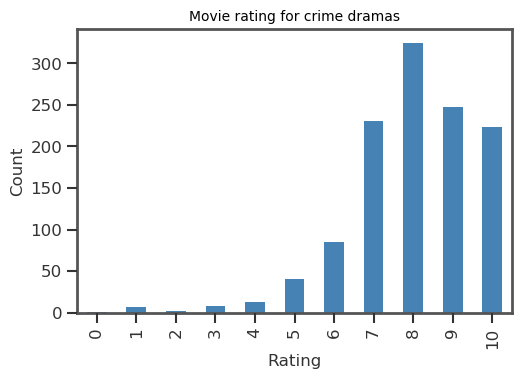

In [18]:
rating_counts = drama_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie rating for crime dramas')
plt.xlabel('Rating')
plt.ylabel('Count')